In [3]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [602]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)

import time
st = time.time()

N_v_points = 200
V_d_vec = np.linspace(200e-3,170e-3,N_v_points)
I_vec = np.zeros(N_v_points)
mu_d_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3,sigma= (x[1] - x[0]),x_0 = (x[1] - x[0]))

battery_ind = []
max_prob_node = []


for i in range(N_v_points):
    if (i % 10 == 0):
        print i
    
    d = (V_d_vec[i],0,0.10,1)
    b1 = (-200e-3,0.400,0.1,1)
    b2 = (-200e-3,-0.400,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
    mu_l = (0.05,0.05-0.001)
    
    graph_model = (25,1)
    battery_weight = 10000
    kT = 400e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
        max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
        graph_model = (max_prob_node_trial,1)
        print graph_model
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  

    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)[0]]
    
        
print time.time()-st

0
(8, 1)
10


KeyboardInterrupt: 

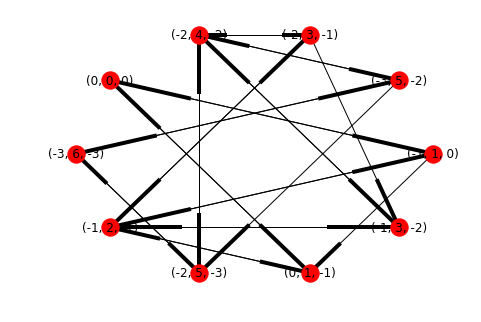

In [599]:
nx.draw_shell(G,with_labels=True)

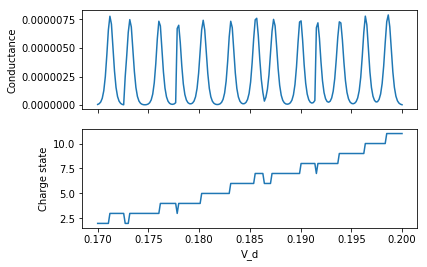

In [601]:
fig,axarr = plt.subplots(2,sharex=True)
axarr[0].plot(V_d_vec,I_vec)
axarr[0].set_ylabel('Conductance')
max_prob_node = np.array(max_prob_node)
axarr[1].plot(V_d_vec,max_prob_node[:,1])
axarr[1].set_xlabel('V_d')
axarr[1].set_ylabel('Charge state')

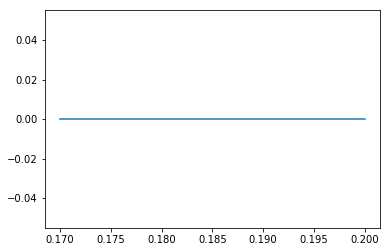

In [568]:
plt.plot(V_d_vec,mu_d_vec)

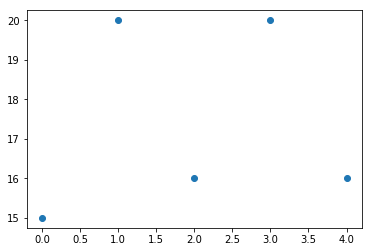

In [231]:

size = []
n_start = 0
n_end = 5
for i in range(n_start,n_end,1):
    plt_ind = np.argwhere(max_prob_node[:,1] == i)
    size += [plt_ind[-1] - plt_ind[0]]
    
plt.plot(range(n_start,n_end,1),size,'o')

In [217]:
data = []
for i in range(len(V_d_vec)):
    data += [[V_d_vec[i],I_vec[i],max_prob_node[i,1]]]
    
data = np.array(data)-
np.savetxt('/Users/ssk4/quantum-ml/ndot/ml/data/single_dot.txt',data)

SyntaxError: invalid syntax (<ipython-input-217-b7dcdf41a9cd>, line 5)

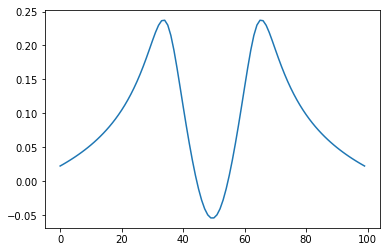

In [277]:
plt.plot(V)

In [161]:
XX,YY = np.meshgrid(np.array(G.nodes())[:,1],V_d_vec)

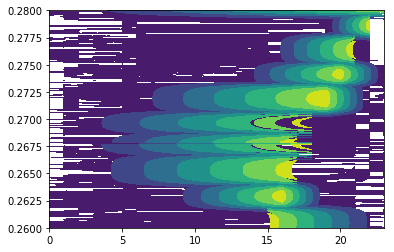

In [168]:
plt.contourf(XX,YY,np.real(np.array(max_prob_dist).reshape((N_v_points,np.array(max_prob_dist).shape[1]))),\
          )

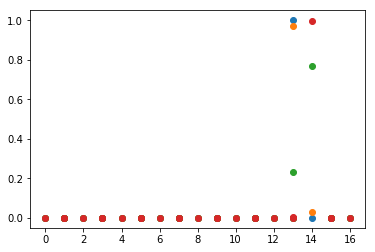

In [135]:
for i in range(80,60,-5):
    plt.plot(np.array(G.nodes())[:,1],max_prob_dist[i],'o')

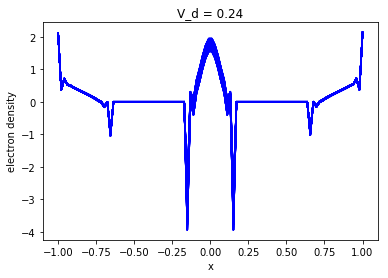

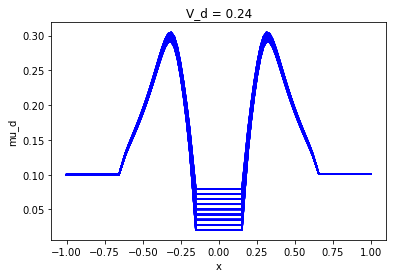

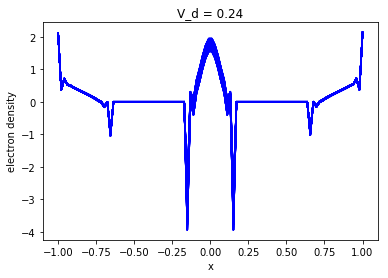

In [195]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)
from IPython import display
%pdb

import time
st = time.time()

for i in range(N_v_points):
    if (i % 10 == 0):
        print i

    n,mu = thomas_fermi.solve_thomas_fermi(x,V,K,mu_l,max_prob_node[i][1:-1])
    
    mask = dot_classifier.get_mask(x,V,K,mu_l[0])
    dot_info = dot_classifier.get_dot_info(mask)
    print dot_info
    
    plt.figure(1)
    plt.plot(x,mu,'b')
    plt.xlabel('x')
    plt.ylabel('mu_d')
    plt.title('V_d = ' + str(V_d_vec[i]))
    
    plt.figure(2)
    plt.plot(x,n,'b')
    plt.xlabel('x')
    plt.ylabel('electron density')
    plt.title('V_d = ' + str(V_d_vec[i]))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)
    
   
    

In [170]:
n


array([ 2.05573011,  0.36350612,  0.69315538,  0.51634683,  0.48613363,
        0.428187  ,  0.38217866,  0.3356152 ,  0.29004165,  0.24382594,
        0.19643825,  0.14652621,  0.09493601,  0.03304617, -0.01246206,
       -0.15930758,  0.03443652, -1.14536252,  0.44908209, -0.2786066 ,
       -0.08066488, -0.12716428, -0.11257714, -0.11457983, -0.11357936,
       -0.11448656, -0.11603873, -0.11856751, -0.12204512, -0.12658481,
       -0.13232348, -0.13947275, -0.14831448, -0.15932005, -0.17290095,
       -0.19075939, -0.21118792, -0.24890754, -0.25902487, -0.4438724 ,
       -0.05506367, -2.00505753,  0.15261769,  0.16916551,  0.65459638,
        1.00876872,  1.39539827,  1.76353985,  2.0818284 ,  2.27442619,
        2.27441586,  2.08179733,  1.76348788,  1.3953251 ,  1.00867391,
        0.65447937,  0.16902558,  0.15245397, -2.00524609, -0.05527832,
       -0.44411463, -0.25929644, -0.24921052, -0.21152476, -0.19113297,
       -0.17331472, -0.1597781 , -0.14882177, -0.14003528, -0.13

In [536]:
%pdb 

Automatic pdb calling has been turned OFF
